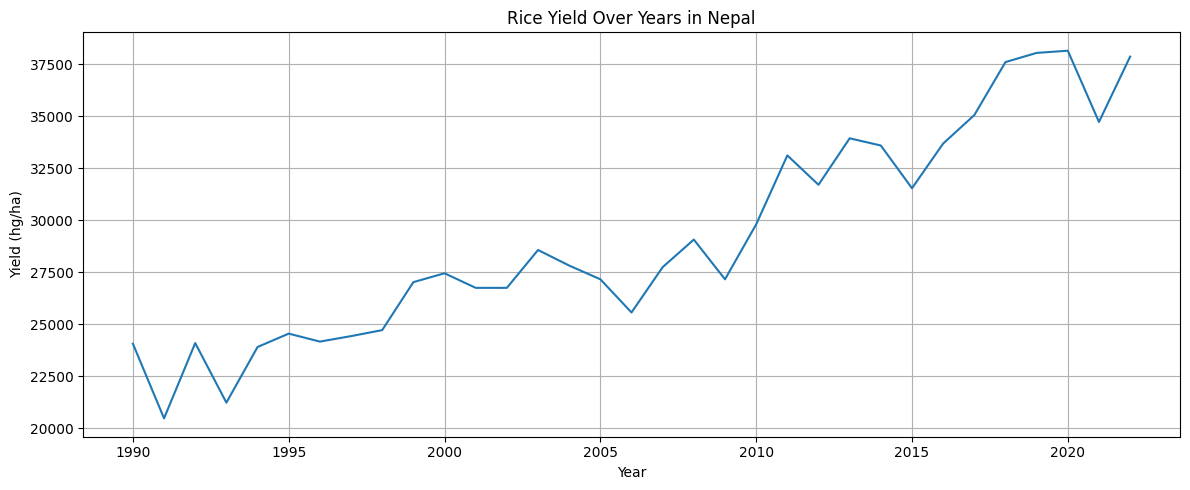

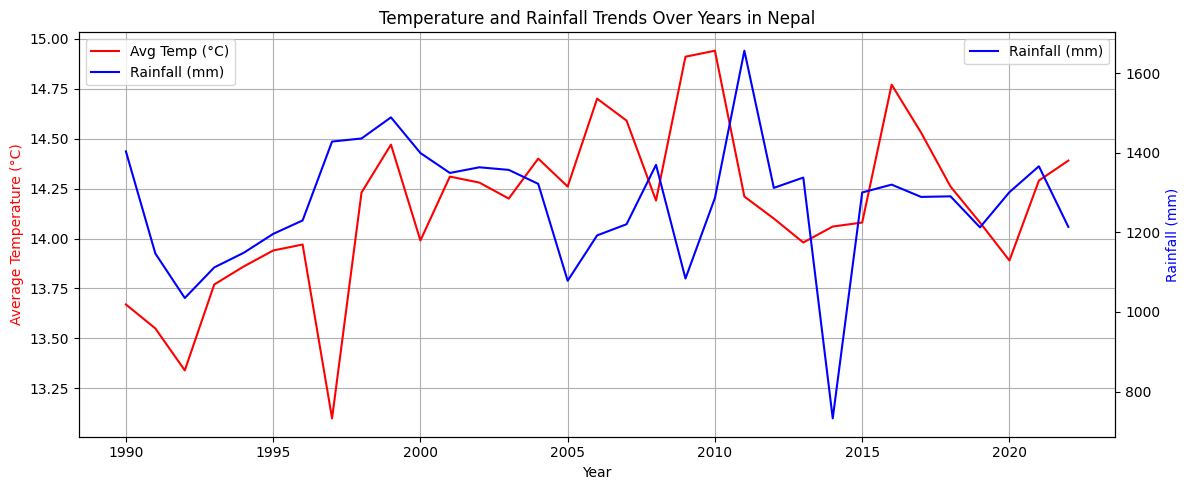

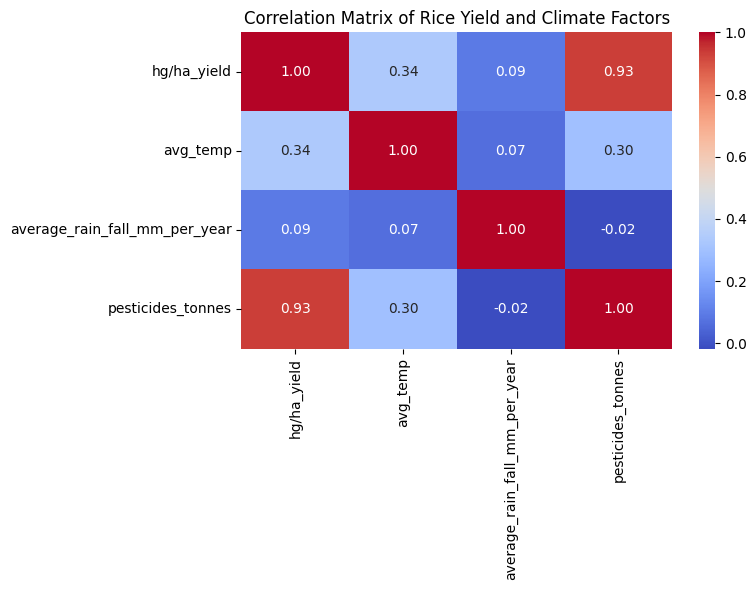

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# PathsC:\Users\Rajan Mahato\OneDrive - Softwarica College\Desktop\nepal-rice-yield-forecast\data
DATA_PATH = r"C:\Users\Rajan Mahato\OneDrive - Softwarica College\Desktop\nepal-rice-yield-forecast\data\processed\rice_data.csv"
OUTPUT_DIR = r"C:\Users\Rajan Mahato\OneDrive - Softwarica College\Desktop\nepal-rice-yield-forecast\outputs\plots"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load data
df = pd.read_csv(DATA_PATH)
df['Year'] = df['Year'].astype(int)

# 1. Rice Yield Over Years
plt.figure(figsize=(12,5))
sns.lineplot(x='Year', y='hg/ha_yield', data=df)
plt.title('Rice Yield Over Years in Nepal')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'rice_yield_trend.png'))
plt.show()

# 2. Temperature and Rainfall Trends with Twin Axes
fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()

sns.lineplot(x='Year', y='avg_temp', data=df, ax=ax1, color='red', label='Avg Temp (°C)')
sns.lineplot(x='Year', y='average_rain_fall_mm_per_year', data=df, ax=ax2, color='blue', label='Rainfall (mm)')

ax1.set_ylabel('Average Temperature (°C)', color='red')
ax2.set_ylabel('Rainfall (mm)', color='blue')
ax1.set_title('Temperature and Rainfall Trends Over Years in Nepal')
ax1.grid(True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'temp_rainfall_trends.png'))
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['hg/ha_yield', 'avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_tonnes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Rice Yield and Climate Factors')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'correlation_matrix.png'))
plt.show()


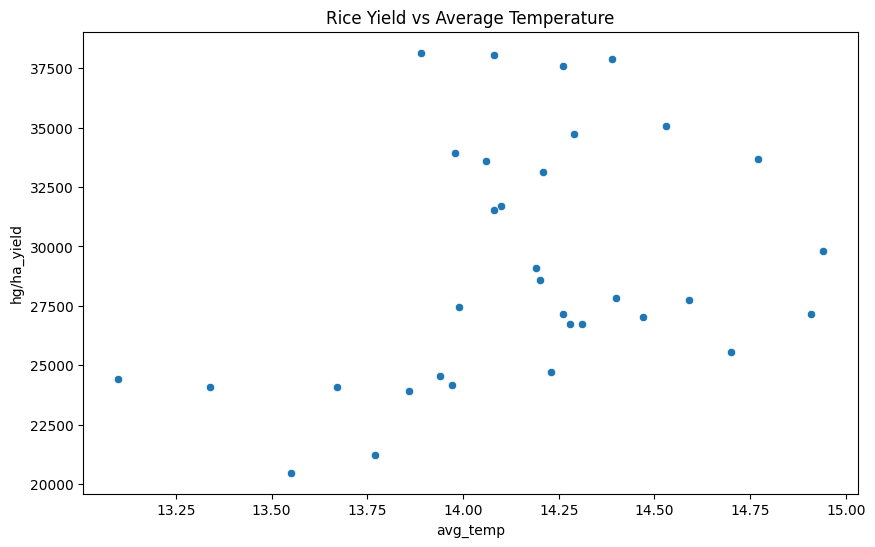

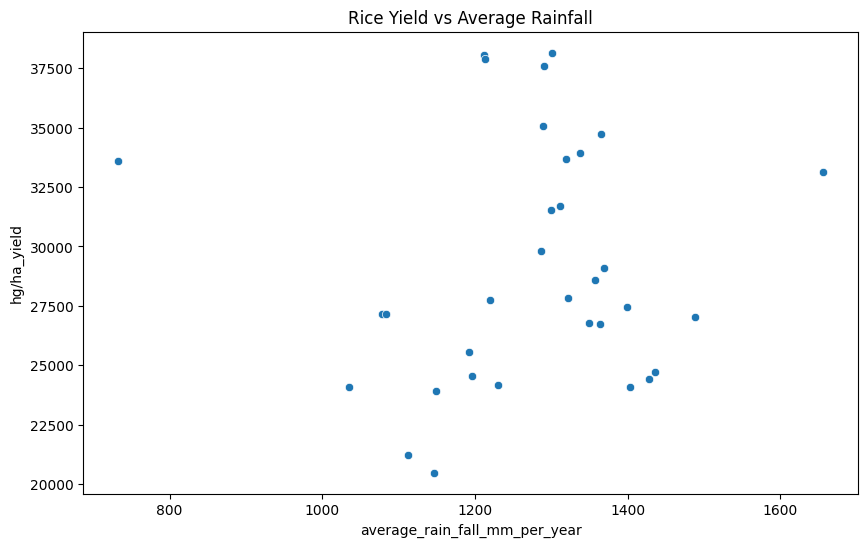

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df)
plt.title('Rice Yield vs Average Temperature')
plt.savefig(os.path.join(OUTPUT_DIR, 'yield_vs_temp.png'))
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df)
plt.title('Rice Yield vs Average Rainfall')
plt.savefig(os.path.join(OUTPUT_DIR, 'yield_vs_rainfall.png'))
plt.show()
